<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.958122,66.283872,60.120340,45.113412,0.000011,273.475757,273.475772,-0.000014
1,0.0,1.0,53.931589,37.303755,31.593396,45.198152,-0.000619,178.026273,178.026905,-0.000631
2,0.0,2.0,54.495916,21.734716,42.724156,73.623341,-0.001077,202.577052,202.577815,-0.000763
3,0.0,3.0,96.338232,79.222869,78.393472,44.837954,0.000086,308.792613,308.792506,0.000107
4,0.0,4.0,60.241411,98.213202,71.948618,78.260359,-0.000064,318.663526,318.663633,-0.000107
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.589268,53.845395,55.635787,91.957625,0.000303,279.028378,279.028209,0.000170
29996,999.0,26.0,34.864807,86.522673,20.982495,29.226229,0.000184,181.596387,181.596139,0.000249
29997,999.0,27.0,67.847872,29.074579,55.460096,43.768002,0.000364,206.150913,206.150304,0.000609
29998,999.0,28.0,59.648714,61.090025,52.451125,74.069033,0.000031,257.258928,257.258942,-0.000014


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.958122  66.283872  60.120340  45.113412  0.000011  273.475757   
      1.0    53.931589  37.303755  31.593396  45.198152 -0.000619  178.026273   
      2.0    54.495916  21.734716  42.724156  73.623341 -0.001077  202.577052   
      3.0    96.338232  79.222869  78.393472  44.837954  0.000086  308.792613   
      4.0    60.241411  98.213202  71.948618  78.260359 -0.000064  318.663526   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  0.000303  279.028378   
      26.0   34.864807  86.522673  20.982495  29.226229  0.000184  181.596387   
      27.0   67.847872  29.074579  55.460096  43.768002  0.000364  206.150913   
      28.0   59.648714  61.090025  52.451125  74.069033  0.000031  257.258928   
      29.0   26.873334  46.895474  59.069410  21.221311 -0.000470  164.059059   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.475772 -0.000014  
      1.0    178.026905 -0.000631  
      2.0    202.577815 -0.000763  
      3.0    308.792506  0.000107  
      4.0    318.663633 -0.000107  
...                 ...       ...  
999.0 25.0   279.028209  0.000170  
      26.0   181.596139  0.000249  
      27.0   206.150304  0.000609  
      28.0   257.258942 -0.000014  
      29.0   164.058973  0.000086  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.958122  66.283872  60.120340  45.113412  0.000011  273.475757   
      1.0    53.931589  37.303755  31.593396  45.198152 -0.000619  178.026273   
      2.0    54.495916  21.734716  42.724156  73.623341 -0.001077  202.577052   
      3.0    96.338232  79.222869  78.393472  44.837954  0.000086  308.792613   
      4.0    60.241411  98.213202  71.948618  78.260359 -0.000064  318.663526   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  0.000303  279.028378   
      26.0   34.864807  86.522673  20.982495  29.226229  0.000184  181.596387   
      27.0   67.847872  29.074579  55.460096  43.768002  0.000364  206.150913   
      28.0   59.648714  61.090025  52.451125  74.069033  0.000031  257.258928   
      29.0   26.873334  46.895474  59.069410  21.221311 -0.000470  164.059059   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.475772 -0.000014  
      1.0    178.026905 -0.000631  
      2.0    202.577815 -0.000763  
      3.0    308.792506  0.000107  
      4.0    318.663633 -0.000107  
...                 ...       ...  
999.0 25.0   279.028209  0.000170  
      26.0   181.596139  0.000249  
      27.0   206.150304  0.000609  
      28.0   257.258942 -0.000014  
      29.0   164.058973  0.000086  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.958122,66.283872,60.120340,45.113412,0.000011,273.475757,273.475772,-0.000014
1,0.0,1.0,53.931589,37.303755,31.593396,45.198152,-0.000619,178.026273,178.026905,-0.000631
2,0.0,2.0,54.495916,21.734716,42.724156,73.623341,-0.001077,202.577052,202.577815,-0.000763
3,0.0,3.0,96.338232,79.222869,78.393472,44.837954,0.000086,308.792613,308.792506,0.000107
4,0.0,4.0,60.241411,98.213202,71.948618,78.260359,-0.000064,318.663526,318.663633,-0.000107
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.589268,53.845395,55.635787,91.957625,0.000303,279.028378,279.028209,0.000170
29996,999.0,26.0,34.864807,86.522673,20.982495,29.226229,0.000184,181.596387,181.596139,0.000249
29997,999.0,27.0,67.847872,29.074579,55.460096,43.768002,0.000364,206.150913,206.150304,0.000609
29998,999.0,28.0,59.648714,61.090025,52.451125,74.069033,0.000031,257.258928,257.258942,-0.000014


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.958122  66.283872  60.120340  45.113412  0.000011  273.475757   
      1.0    53.931589  37.303755  31.593396  45.198152 -0.000619  178.026273   
      2.0    54.495916  21.734716  42.724156  73.623341 -0.001077  202.577052   
      3.0    96.338232  79.222869  78.393472  44.837954  0.000086  308.792613   
      4.0    60.241411  98.213202  71.948618  78.260359 -0.000064  318.663526   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  0.000303  279.028378   
      26.0   34.864807  86.522673  20.982495  29.226229  0.000184  181.596387   
      27.0   67.847872  29.074579  55.460096  43.768002  0.000364  206.150913   
      28.0   59.648714  61.090025  52.451125  74.069033  0.000031  257.258928   
      29.0   26.873334  46.895474  59.069410  21.221311 -0.000470  164.059059   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.475772 -0.000014  
      1.0    178.026905 -0.000631  
      2.0    202.577815 -0.000763  
      3.0    308.792506  0.000107  
      4.0    318.663633 -0.000107  
...                 ...       ...  
999.0 25.0   279.028209  0.000170  
      26.0   181.596139  0.000249  
      27.0   206.150304  0.000609  
      28.0   257.258942 -0.000014  
      29.0   164.058973  0.000086  

[30000 rows x 8 columns]

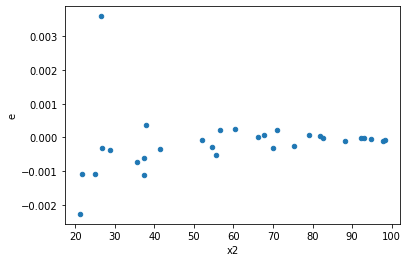

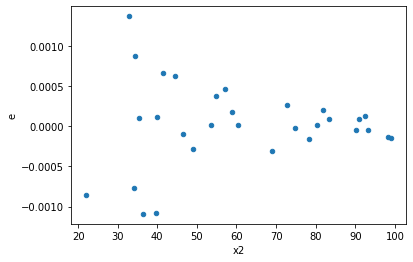

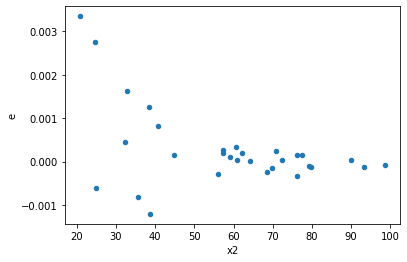

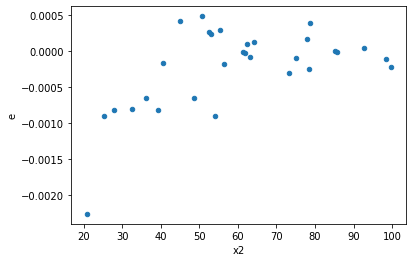

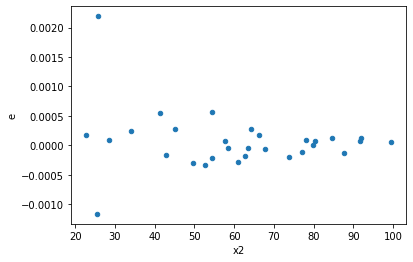

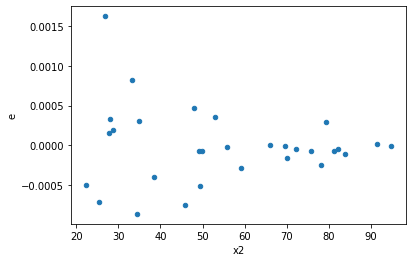

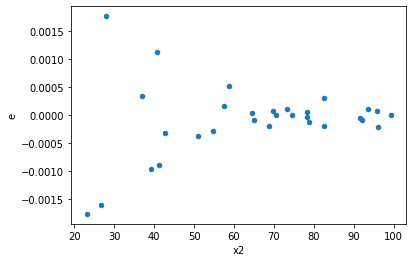

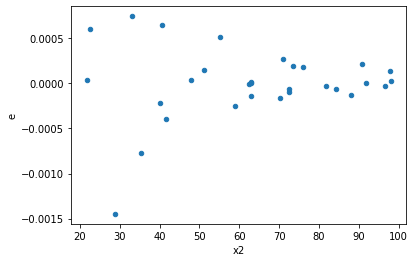

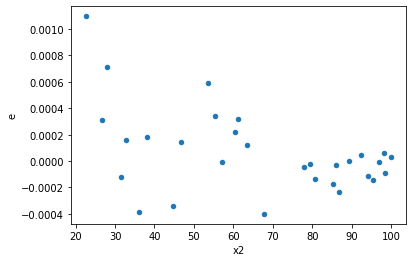

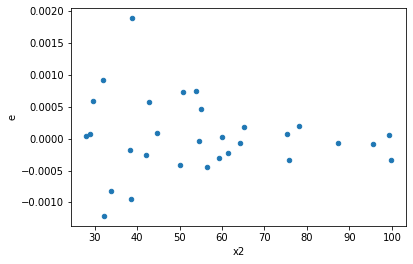

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,13.0,1.104747166284864e-07,6.230472132868787e-06,1.2274968514276266e-08,4.792670871437529e-07,39.044262035079484,1.163314584662345e-07,0.9999999418342708,5.816572923311725e-08,Reject005=0 : Heteroscedasticity
6.0,14.0,8.0,4.411231706420882e-06,6.044647910596533e-06,3.15087979030063e-07,7.555809888245666e-07,2.3980000479563692,0.21586489243993978,0.8920675537800301,0.10793244621996989,Reject005=1 : Homoscedasticity
8.0,12.0,10.0,4.7559706076496056e-07,9.79100827230645e-07,3.963308839708005e-08,9.79100827230645e-08,2.470412644659758,0.16153857706371988,0.9192307114681401,0.08076928853185994,Reject005=1 : Homoscedasticity
9.0,12.0,10.0,1.8858254297700572e-06,4.030310929225887e-06,1.5715211914750476e-07,4.0303109292258873e-07,2.5645921614604457,0.1453981072930317,0.9273009463534841,0.07269905364651585,Reject005=1 : Homoscedasticity
11.0,15.0,7.0,1.3604104638474756e-06,3.3721638871259467e-06,9.069403092316504e-08,4.817376981608495e-07,5.311680308585823,0.03288087254617578,0.9835595637269121,0.01644043627308789,Reject005=0 : Heteroscedasticity
13.0,9.0,13.0,8.221535011112409e-07,1.154593549582066e-05,9.135038901236009e-08,8.881488842938968e-07,9.722442278529613,0.00037096613494469466,0.9998145169325277,0.00018548306747234733,Reject005=0 : Heteroscedasticity
14.0,8.0,14.0,4.3349791856350744e-07,5.8835213198454325e-06,5.418723982043843e-08,4.202515228461023e-07,7.755544003324398,0.0010175477271712197,0.9994912261364144,0.0005087738635856098,Reject005=0 : Heteroscedasticity
15.0,10.0,12.0,1.6555435381101704e-06,3.1714285999926454e-06,1.6555435381101704e-07,2.642857166660538e-07,1.596368265661803,0.438008481274359,0.7809957593628205,0.2190042406371795,Reject005=1 : Homoscedasticity
21.0,11.0,11.0,2.5573178316147353e-07,2.4369861313891023e-06,2.324834392377032e-08,2.2154419376264565e-07,9.529461302236125,0.0007877776814271265,0.9996061111592864,0.0003938888407135632,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,2.0036824224500814e-05,3.096479282526284e-07,1.8215294749546195e-06,2.8149811659329854e-08,0.015453942440339133,4.575996596226617e-08,Reject005=0 : Heteroscedasticity
1.0,9.0,13.0,1.104747166284864e-07,6.230472132868787e-06,1.2274968514276266e-08,4.792670871437529e-07,39.044262035079484,1.163314584662345e-07,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,1.3966352788479068e-05,8.180061139868734e-07,1.269668435316279e-06,7.436419218062485e-08,0.05856977310938699,4.736515882776788e-05,Reject005=0 : Heteroscedasticity
3.0,9.0,13.0,3.2365576093024555e-06,1.2827519383998416e-06,3.596175121447173e-07,9.867322603075705e-08,0.2743838180801634,0.05844545603267464,Reject005=1 : Homoscedasticity
4.0,7.0,15.0,2.2622858414297334e-06,1.8391818374099885e-06,3.2318369163281906e-07,1.2261212249399923e-07,0.3793883344624437,0.19938073573402043,Reject005=1 : Homoscedasticity
5.0,9.0,13.0,2.414724987320067e-06,2.706774112043545e-06,2.6830277636889635e-07,2.0821339323411883e-07,0.7760389066859334,0.7166863199579964,Reject005=1 : Homoscedasticity
6.0,14.0,8.0,4.411231706420882e-06,6.044647910596533e-06,3.15087979030063e-07,7.555809888245666e-07,2.3980000479563692,0.21586489243993978,Reject005=1 : Homoscedasticity
7.0,12.0,10.0,3.809491197770302e-06,4.089766719593061e-07,3.1745759981419185e-07,4.089766719593061e-08,0.128828754516723,0.001489337122172218,Reject005=0 : Heteroscedasticity
8.0,12.0,10.0,4.7559706076496056e-07,9.79100827230645e-07,3.963308839708005e-08,9.79100827230645e-08,2.470412644659758,0.16153857706371988,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    614
Reject005=1 : Homoscedasticity      386
Name: Result_test, dtype: int64